# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Import the data

In [2]:
car_df = pd.read_csv('Car_Purchasing_Data.csv',encoding='latin-1')

In [3]:
car_df.head()

,Customer Name,Customer e-mail,Country,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248


In [4]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Customer Name        500 non-null    object 
 1   Customer e-mail      500 non-null    object 
 2   Country              500 non-null    object 
 3   Gender               500 non-null    int64  
 4   Age                  500 non-null    float64
 5   Annual Salary        500 non-null    float64
 6   Credit Card Debt     500 non-null    float64
 7   Net Worth            500 non-null    float64
 8   Car Purchase Amount  500 non-null    float64
dtypes: float64(5), int64(1), object(3)
memory usage: 35.3+ KB


In [5]:
car_df.describe()

,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,0.506000,46.241674,62127.239608,9607.645049,431475.713625,44209.799218
std,0.500465,7.978862,11703.378228,3489.187973,173536.756340,10773.178744
min,0.000000,20.000000,20000.000000,100.000000,20000.000000,9000.000000
25%,0.000000,40.949969,54391.977195,7397.515792,299824.195900,37629.896040
50%,1.000000,46.049901,62915.497035,9655.035568,426750.120650,43997.783390
75%,1.000000,51.612263,70117.862005,11798.867487,557324.478725,51254.709517
max,1.000000,70.000000,100000.000000,20000.000000,1000000.000000,80000.000000


# Visualise the dataset

<Figure size 432x648 with 0 Axes>

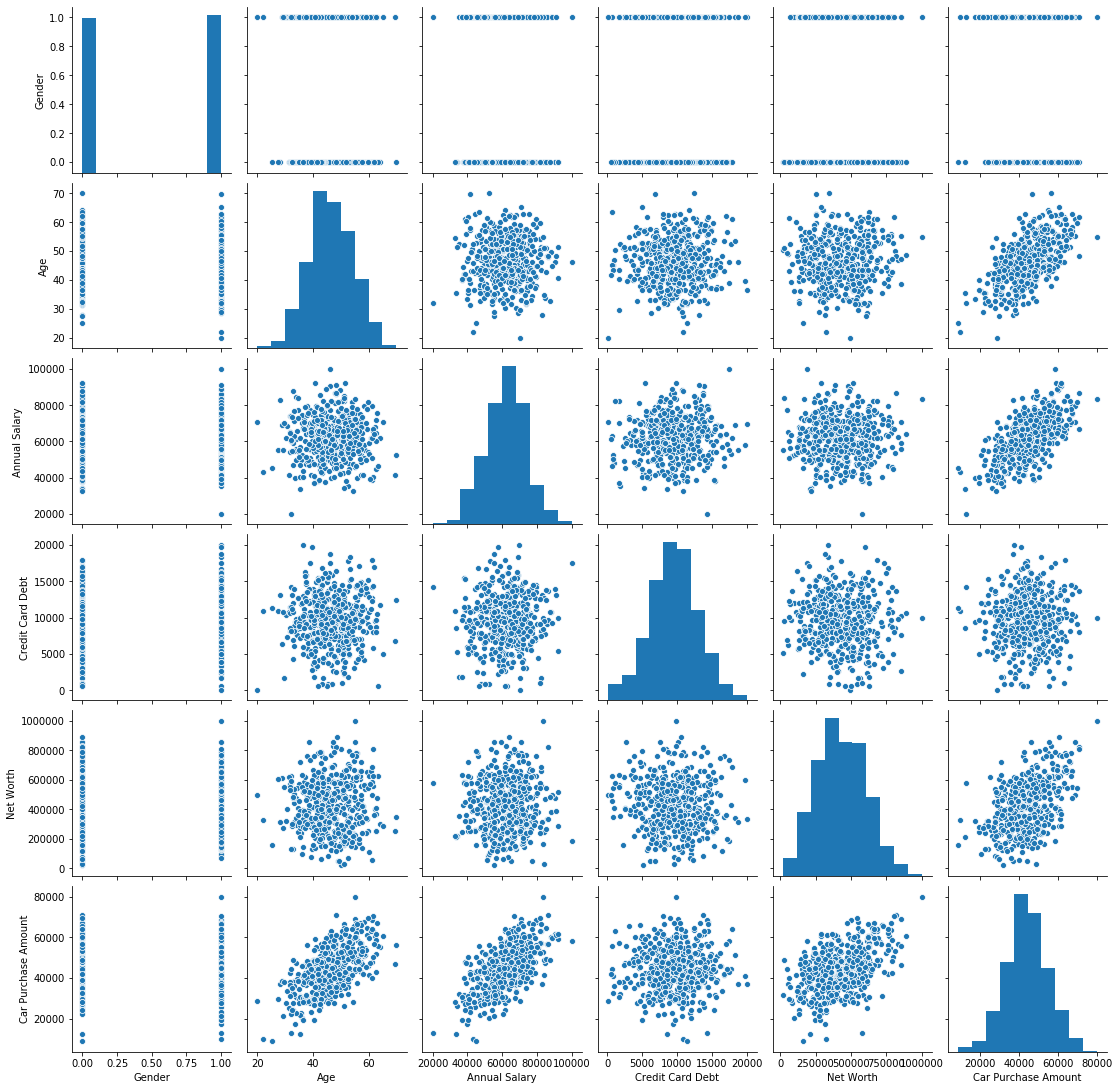

In [6]:
plt.figure(figsize=(6,9))
sns.pairplot(car_df)

# Data Cleaning

Name and email id of the customer may not be a great feature to predict the purchase amount .Lets drop the two columns

In [7]:
car_df = car_df.drop(['Customer Name','Customer e-mail'],axis=1)

Seems that the country name maynot be a good feature even.Lets drop this column.

In [8]:
car_df = car_df.drop(['Country'],axis=1)

In [9]:
car_df.head(5)

,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
0,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248


In [10]:
#now lets create our input features

In [11]:
X = car_df.drop(['Car Purchase Amount'],axis=1)

In [12]:
X.head()

,Gender,Age,Annual Salary,Credit Card Debt,Net Worth
0,0,41.851720,62812.09301,11609.380910,238961.2505
1,0,40.870623,66646.89292,9572.957136,530973.9078
2,1,43.152897,53798.55112,11160.355060,638467.1773
3,1,58.271369,79370.03798,14426.164850,548599.0524
4,1,57.313749,59729.15130,5358.712177,560304.0671


In [13]:
#specifying the output

In [14]:
y = car_df['Car Purchase Amount']

# Normalising the data

In [15]:
from sklearn.preprocessing import MinMaxScaler

In [16]:
scaler = MinMaxScaler()

In [17]:
X_scaled = scaler.fit_transform(X)

In [18]:
X_scaled

array([[0.        , 0.4370344 , 0.53515116, 0.57836085, 0.22342985],
       [0.        , 0.41741247, 0.58308616, 0.476028  , 0.52140195],
       [1.        , 0.46305795, 0.42248189, 0.55579674, 0.63108896],
       ...,
       [1.        , 0.67886994, 0.61110973, 0.52822145, 0.75972584],
       [1.        , 0.78321017, 0.37264988, 0.69914746, 0.3243129 ],
       [1.        , 0.53462305, 0.51713347, 0.46690159, 0.45198622]])

In [19]:
y.shape

(500,)

In [20]:
y = y.values.reshape(-1,1)

In [21]:
y.shape

(500, 1)

In [22]:
y_scaled = scaler.fit_transform(y)

# Model Training

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.30, random_state=101)

In [25]:
X_train.shape

(350, 5)

In [26]:
X_test.shape

(150, 5)

In [27]:
#so 350 data samples have been put into training and the rest into testing.

# Building the Artificial Neural Networks

In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passi

In [29]:
model = Sequential()
model.add(Dense(25,input_dim = 5,activation = 'relu')) #so the number of neurons ,the number of inputs i.e 5(features),the activation fnction i.e rectified linear unit
model.add(Dense(25,activation = 'relu'))
model.add(Dense(1,activation = 'linear')) #we are expecting a continous value output and hence we are using linear activation function

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 25)                150       
_________________________________________________________________
dense_1 (Dense)              (None, 25)                650       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 26        
Total params: 826
Trainable params: 826
Non-trainable params: 0
_________________________________________________________________


In [31]:
model.compile(optimizer='adam',loss='mean_squared_error')

In [32]:
epoch_hist = model.fit(X_train,y_train,epochs=100,batch_size=50,verbose=1,validation_split=0.2)

Train on 280 samples, validate on 70 samples
Epoch 1/100
280/280 [==============================] - 0s 652us/sample - loss: 0.1918 - val_loss: 0.1480
Epoch 2/100
280/280 [==============================] - 0s 75us/sample - loss: 0.1189 - val_loss: 0.0841
Epoch 3/100
280/280 [==============================] - 0s 50us/sample - loss: 0.0642 - val_loss: 0.0409
Epoch 4/100
280/280 [==============================] - 0s 71us/sample - loss: 0.0316 - val_loss: 0.0217
Epoch 5/100
280/280 [==============================] - 0s 32us/sample - loss: 0.0221 - val_loss: 0.0204
Epoch 6/100
280/280 [==============================] - 0s 32us/sample - loss: 0.0233 - val_loss: 0.0211
Epoch 7/100
280/280 [==============================] - 0s 57us/sample - loss: 0.0218 - val_loss: 0.0177
Epoch 8/100
280/280 [==============================] - 0s 39us/sample - loss: 0.0183 - val_loss: 0.0148
Epoch 9/100
280/280 [==============================] - 0s 50us/sample - loss: 0.0160 - val_loss: 0.0139
Epoch 10/100
280/2

280/280 [==============================] - 0s 96us/sample - loss: 5.2240e-04 - val_loss: 3.7762e-04
Epoch 78/100
280/280 [==============================] - 0s 96us/sample - loss: 4.9125e-04 - val_loss: 3.5799e-04
Epoch 79/100
280/280 [==============================] - 0s 64us/sample - loss: 4.7526e-04 - val_loss: 3.4445e-04
Epoch 80/100
280/280 [==============================] - 0s 57us/sample - loss: 4.4727e-04 - val_loss: 3.2665e-04
Epoch 81/100
280/280 [==============================] - 0s 53us/sample - loss: 4.2767e-04 - val_loss: 3.1698e-04
Epoch 82/100
280/280 [==============================] - 0s 46us/sample - loss: 4.1140e-04 - val_loss: 3.0414e-04
Epoch 83/100
280/280 [==============================] - 0s 28us/sample - loss: 3.9155e-04 - val_loss: 2.8995e-04
Epoch 84/100
280/280 [==============================] - 0s 43us/sample - loss: 3.7748e-04 - val_loss: 2.7802e-04
Epoch 85/100
280/280 [==============================] - 0s 46us/sample - loss: 3.6328e-04 - val_loss: 2.6960e

# Evaluating the model

Visualise how the model has been trained

In [33]:
epoch_hist.history.keys()

dict_keys(['loss', 'val_loss'])

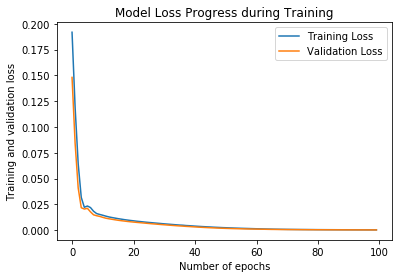

In [34]:
plt.plot(epoch_hist.history['loss'])
plt.plot(epoch_hist.history['val_loss'])
plt.title('Model Loss Progress during Training')
plt.ylabel('Training and validation loss')
plt.xlabel('Number of epochs')
plt.legend(['Training Loss','Validation Loss'])


In [35]:
car_df.head()

,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
0,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248


In [36]:
#lets try to predict car purchase amount of a new customer

In [39]:
X_test = np.array([[1,40,40000,12000,200000]])

In [41]:
y_predict = model.predict(X_test)

In [46]:
print('predicted price',y_predict)

predicted price [[87070.03]]


So our model is now capable of predicting the car purchase price! given the customers features